### Build a K Nearest Neighbour model to predict if the value of of a cryptocurrency will increase or not.

Classification model.

Dataset:Yahoo finance API

### Process:

Load doge data via Yahoofinance API

Preprocess the data

Trained K_Nearest_Neighbor and used it to make prediction

Evaluate the model

Tweak the model by evaluating the best value for K

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [35]:
import yfinance
symbol = "DOGE-USD"
start = "2014-01-01"
end = "2023-06-06"
dataframe = yfinance.download(symbol, start, end)
dataframe

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...
2023-06-01,0.071662,0.072119,0.070882,0.071492,0.071492,163467169
2023-06-02,0.071490,0.073198,0.071168,0.072612,0.072612,172034498
2023-06-03,0.072610,0.072947,0.072334,0.072671,0.072671,112049190


In [36]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2017-11-09 to 2023-06-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2035 non-null   float64
 1   High       2035 non-null   float64
 2   Low        2035 non-null   float64
 3   Close      2035 non-null   float64
 4   Adj Close  2035 non-null   float64
 5   Volume     2035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 111.3 KB


Save to CSV

In [37]:
dataframe.to_csv("doge_2014_2023.csv")

In [38]:
df = pd.read_csv("doge_2014_2023.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
2030,2023-06-01,0.071662,0.072119,0.070882,0.071492,0.071492,163467169
2031,2023-06-02,0.071490,0.073198,0.071168,0.072612,0.072612,172034498
2032,2023-06-03,0.072610,0.072947,0.072334,0.072671,0.072671,112049190
2033,2023-06-04,0.072672,0.073250,0.072466,0.072471,0.072471,135558595


### Data Preprocessing

In [39]:
import numpy as np

In [40]:
# Create classifier columns
# if the next day's price is greater than the current date price, price increase/decrease =1, else=-1

INCREASE = 1

DECREASE = -1

df["price_increase/decrease"] = np.where(df["Close"].shift(-1) > df["Close"],
                                          1,-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume,price_increase/decrease
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,-1
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,1
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,-1
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,1
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,-1
...,...,...,...,...,...,...,...,...
2030,2023-06-01,0.071662,0.072119,0.070882,0.071492,0.071492,163467169,1
2031,2023-06-02,0.071490,0.073198,0.071168,0.072612,0.072612,172034498,1
2032,2023-06-03,0.072610,0.072947,0.072334,0.072671,0.072671,112049190,-1
2033,2023-06-04,0.072672,0.073250,0.072466,0.072471,0.072471,135558595,-1


In [41]:
X = df.iloc[:,1:6]
X

,Open,High,Low,Close,Adj Close
0,0.001207,0.001415,0.001181,0.001415,0.001415
1,0.001421,0.001431,0.001125,0.001163,0.001163
2,0.001146,0.001257,0.001141,0.001201,0.001201
3,0.001189,0.001210,0.001002,0.001038,0.001038
4,0.001046,0.001212,0.001019,0.001211,0.001211
...,...,...,...,...,...
2030,0.071662,0.072119,0.070882,0.071492,0.071492
2031,0.071490,0.073198,0.071168,0.072612,0.072612
2032,0.072610,0.072947,0.072334,0.072671,0.072671
2033,0.072672,0.073250,0.072466,0.072471,0.072471


In [42]:
X = df.iloc[:, 1:6].values
X

array([[0.001207, 0.001415, 0.001181, 0.001415, 0.001415],
       [0.001421, 0.001431, 0.001125, 0.001163, 0.001163],
       [0.001146, 0.001257, 0.001141, 0.001201, 0.001201],
       ...,
       [0.07261 , 0.072947, 0.072334, 0.072671, 0.072671],
       [0.072672, 0.07325 , 0.072466, 0.072471, 0.072471],
       [0.072475, 0.072632, 0.064828, 0.066573, 0.066573]])

In [43]:
y = df.iloc[:,7].values
y

array([-1,  1, -1, ..., -1, -1, -1])

### Split Data into training and testing:

Train-test splitting

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train.shape

(1628, 5)

In [47]:
X_test.shape

(407, 5)

In [48]:
y_test.shape

(407,)

In [49]:
y_train.shape

(1628,)

### Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit(X_train)

X_train_scaled = standard_scaler.transform(X_train)
X_train_scaled

array([[ 1.36179264,  1.25678832,  1.34578197,  1.21692992,  1.21692992],
       [-0.64649526, -0.63227275, -0.66102378, -0.64576951, -0.64576951],
       [ 2.77193553,  2.58535604,  2.86392468,  2.70333258,  2.70333258],
       ...,
       [-0.64079251, -0.62710724, -0.65409523, -0.64015818, -0.64015818],
       [ 0.75429609,  0.66577704,  0.75581816,  0.67482112,  0.67482112],
       [-0.62368424, -0.61109516, -0.63935438, -0.62506752, -0.62506752]])

In [51]:
standard_scaler.fit(X_test)
X_test_scaled = standard_scaler.transform(X_test)
X_test_scaled

array([[-0.62967948, -0.62117544, -0.64657423, -0.63281037, -0.63281037],
       [ 0.95582621,  0.8779741 ,  0.99441543,  0.94119302,  0.94119302],
       [ 0.1322679 ,  0.09355002,  0.1387001 ,  0.11450392,  0.11450392],
       ...,
       [-0.62458626, -0.61588098, -0.64083276, -0.6271727 , -0.6271727 ],
       [ 2.88810623,  3.31852482,  3.17714043,  3.55418357,  3.55418357],
       [ 0.70022808,  0.66973125,  0.6092844 ,  0.56510753,  0.56510753]])

In [52]:
y_test

array([ 1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [63]:
model.predict(X_test_scaled)

array([-1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
        1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1, -1, -1

### Model's Prediction

In [64]:
y_prediction = model.predict(X_test_scaled)
y_prediction

array([-1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
        1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1, -1, -1

### Model Comparison Using Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test, y_prediction)

array([[113,  89],
       [112,  93]], dtype=int64)

In [67]:
# convert confusion matrix into a dataframe

matrix = confusion_matrix(y_test, y_prediction)

pd.DataFrame(matrix)

,0,1
0,113,89
1,112,93


### Get Classification Report

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

          -1       0.50      0.56      0.53       202
           1       0.51      0.45      0.48       205

    accuracy                           0.51       407
   macro avg       0.51      0.51      0.50       407
weighted avg       0.51      0.51      0.50       407



### Finding the best value of K :

Calculating the error for different k-values

In [69]:
K_MIN = 1
K_MAX = 30
errors =[]

for i in range(K_MIN, K_MAX):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_scaled, y_train)
    y_prediction = model.predict(X_test_scaled)

    errors.append(np.mean(y_prediction != y_test))
errors

[0.4987714987714988,
 0.5233415233415234,
 0.5405405405405406,
 0.515970515970516,
 0.49385749385749383,
 0.515970515970516,
 0.515970515970516,
 0.5085995085995086,
 0.5036855036855037,
 0.5257985257985258,
 0.5356265356265356,
 0.5331695331695332,
 0.5135135135135135,
 0.5331695331695332,
 0.538083538083538,
 0.5405405405405406,
 0.547911547911548,
 0.538083538083538,
 0.5233415233415234,
 0.5405405405405406,
 0.5282555282555282,
 0.5135135135135135,
 0.5110565110565111,
 0.515970515970516,
 0.5208845208845209,
 0.5405405405405406,
 0.5208845208845209,
 0.5085995085995086,
 0.5257985257985258]

Text(0, 0.5, 'Error')

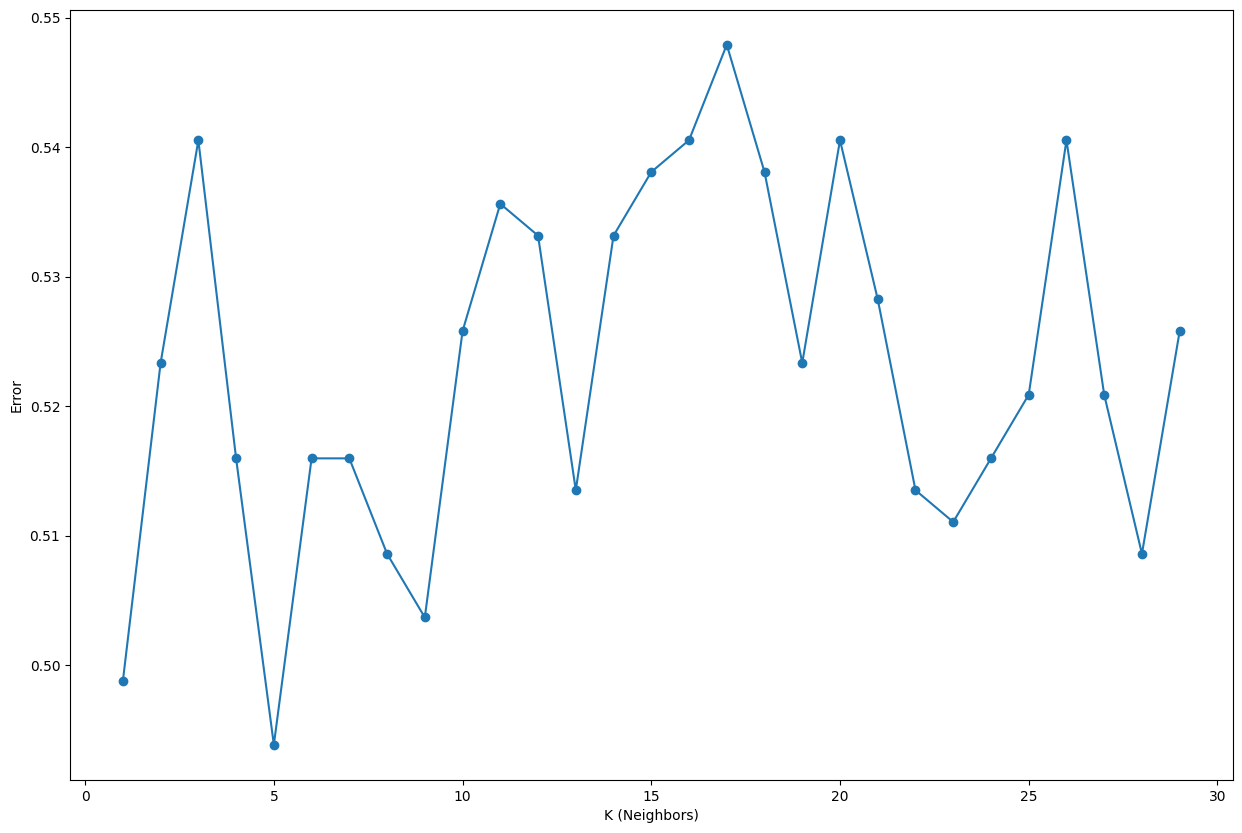

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(range(K_MIN, K_MAX), errors, marker="o")
plt.xlabel("K (Neighbors)")
plt.ylabel("Error")